# ASSIGNMENT

This notebook focuses on exploratory data analysis (EDA) and business insights

**Aims:**
- Clean and prepare the dataset  
- Understand the customer funnel (Applied → Approved → Funded)  
- Explore segment differences (car type, area, age bands, etc)  
- Assess loan economics (loan, deposit, net exposure)  
- Provide clear business recommendations for the marketing team  


##### Importing Python Libraries for Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings("ignore")

# File Paths
DATA_PATH = 'C:/Users/folas/Downloads/Case_Study_for_Data_Test_25.csv'
OUT_DIR = 'C:/Users/folas/Downloads/'
os.makedirs(OUT_DIR, exist_ok=True)

##### Read in Dataset

In [7]:
try:
    df = pd.read_csv(DATA_PATH)
except Exception:
    df = pd.read_csv(DATA_PATH, encoding="latin1")
df.head()

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
0,9997,61,Convertible,"£24,108.00",£881.00,rural,0.15,approved,No
1,9996,42,Saloon,"£5,988.00",£967.00,rural,0.20,approved,No
2,9995,57,Saloon,"£5,099.00",£973.00,urban,0.15,approved,No
3,9994,32,Convertible,"£20,774.00","£1,478.00",rural,NaN,declined,NaN
4,9993,29,Saloon,"£4,612.00",£774.00,urban,NaN,declined,NaN


##### Data Preparation

In [10]:
# Cleaned Loanamount and Deposit
df.columns = df.columns.str.strip()
def clean_currency(col: pd.Series) -> pd.Series:
    return (col.str.replace(r"[£,]", "", regex=True).astype("float64") )
df["Loanamount"] = clean_currency(df["Loanamount"])
df["Deposit"]    = clean_currency(df["Deposit"])
print(df.dtypes)
df.head()

ID                       int64
age                      int64
car_type                object
Loanamount             float64
Deposit                float64
area                    object
APR                    float64
application_outcome     object
Funded                  object
dtype: object


,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded
0,9997,61,Convertible,24108.0,881.0,rural,0.15,approved,No
1,9996,42,Saloon,5988.0,967.0,rural,0.20,approved,No
2,9995,57,Saloon,5099.0,973.0,urban,0.15,approved,No
3,9994,32,Convertible,20774.0,1478.0,rural,NaN,declined,NaN
4,9993,29,Saloon,4612.0,774.0,urban,NaN,declined,NaN


In [12]:
# Null Values
df['Funded'] = df['Funded'].fillna('N/A')
df['APR'] = df['APR'].fillna(0.0).astype(float)
print(df[['Funded', 'APR']].isna().sum())
print(df[['Funded', 'APR']].dtypes)
print(df[['Funded', 'APR']].head())

Funded    0
APR       0
dtype: int64
Funded     object
APR       float64
dtype: object
  Funded   APR
0     No  0.15
1     No  0.20
2     No  0.15
3    N/A  0.00
4    N/A  0.00


In [14]:
# Created feature: Loanamount_Grouped
bins = [0,4_800,7_200,9_600,12_000,14_400,16_800,19_200,21_600,24_000,np.inf]
labels = ['<4,800','4,800-7,199','7,200-9,599','9,600-11,999','12,000-14,399','14,400-16,799','16,800-19,199','19,200-21,599','21,600-23,999','>=24,000']
df['Loanamount_Grouped'] = pd.cut(df['Loanamount'],bins=bins,labels=labels,right=False)
print(df[['Loanamount', 'Loanamount_Grouped']].head(10))
print(df['Loanamount_Grouped'].value_counts().sort_index())

   Loanamount Loanamount_Grouped
0     24108.0           >=24,000
1      5988.0        4,800-7,199
2      5099.0        4,800-7,199
3     20774.0      19,200-21,599
4      4612.0             <4,800
5      2980.0             <4,800
6      9738.0       9,600-11,999
7      6341.0        4,800-7,199
8     18056.0      16,800-19,199
9     14884.0      14,400-16,799
Loanamount_Grouped
<4,800           1269
4,800-7,199      1121
7,200-9,599      1703
9,600-11,999     1325
12,000-14,399    1289
14,400-16,799    1128
16,800-19,199     841
19,200-21,599     578
21,600-23,999     415
>=24,000          331
Name: count, dtype: int64


In [16]:
# Created feature: Deposit_Grouped
bins = [0,600,1200,1800,2400,3000,3600,4200,4800,5400,np.inf]
labels = ['<600','600-1,199','1,200-1,799','1,800-2,399','2,400-2,999','3,000-3,599','3,600-4,199','4,200-4,799','4,800-5,399','>=5,400']
df['Deposit_Grouped'] = pd.cut(df['Deposit'],bins=bins,labels=labels,right=False)
print(df[['Deposit', 'Deposit_Grouped']].head(10))
print(df['Deposit_Grouped'].value_counts().sort_index())

   Deposit Deposit_Grouped
0    881.0       600-1,199
1    967.0       600-1,199
2    973.0       600-1,199
3   1478.0     1,200-1,799
4    774.0       600-1,199
5    679.0       600-1,199
6    671.0       600-1,199
7    533.0            <600
8   1152.0       600-1,199
9   1233.0     1,200-1,799
Deposit_Grouped
<600            268
600-1,199      2526
1,200-1,799    1381
1,800-2,399     879
2,400-2,999     905
3,000-3,599     831
3,600-4,199     870
4,200-4,799     818
4,800-5,399     749
>=5,400         773
Name: count, dtype: int64


In [18]:
# Created feature: Age_Grouped
age_bins = [18, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66]
age_labels = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65']
df['Age_Grouped'] = pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age', 'Age_Grouped']].head())
print(df['Age_Grouped'].value_counts().sort_index())

   age Age_Grouped
0   61       61-65
1   42       41-45
2   57       56-60
3   32       31-35
4   29       26-30
Age_Grouped
18-20     564
21-25    1646
26-30     967
31-35     952
36-40    1003
41-45     956
46-50    1021
51-55     907
56-60     983
61-65    1001
Name: count, dtype: int64


In [20]:
# Created features: Net_Exposure
df['Net_Exposure'] = df['Loanamount'] - df['Deposit']
print(df[['Loanamount', 'Deposit', 'Net_Exposure']].head())

   Loanamount  Deposit  Net_Exposure
0     24108.0    881.0       23227.0
1      5988.0    967.0        5021.0
2      5099.0    973.0        4126.0
3     20774.0   1478.0       19296.0
4      4612.0    774.0        3838.0


In [22]:
# Flag features created for filtering Funded and Approved apps
if "Funded" in df.columns:
    df["funded_flag"] = df["Funded"].astype(str).str.contains("Yes", case=False, na=False).astype(int)

if "application_outcome" in df.columns:
    df["approved_flag"] = df["application_outcome"].astype(str).str.contains("approved", case=False, na=False).astype(int)
df.head()

,ID,age,car_type,Loanamount,Deposit,area,APR,application_outcome,Funded,Loanamount_Grouped,Deposit_Grouped,Age_Grouped,Net_Exposure,funded_flag,approved_flag
0,9997,61,Convertible,24108.0,881.0,rural,0.15,approved,No,">=24,000","600-1,199",61-65,23227.0,0,1
1,9996,42,Saloon,5988.0,967.0,rural,0.20,approved,No,"4,800-7,199","600-1,199",41-45,5021.0,0,1
2,9995,57,Saloon,5099.0,973.0,urban,0.15,approved,No,"4,800-7,199","600-1,199",56-60,4126.0,0,1
3,9994,32,Convertible,20774.0,1478.0,rural,0.00,declined,N/A,"19,200-21,599","1,200-1,799",31-35,19296.0,0,0
4,9993,29,Saloon,4612.0,774.0,urban,0.00,declined,N/A,"<4,800","600-1,199",26-30,3838.0,0,0


##### Exploratory Data Analysis (EDA)

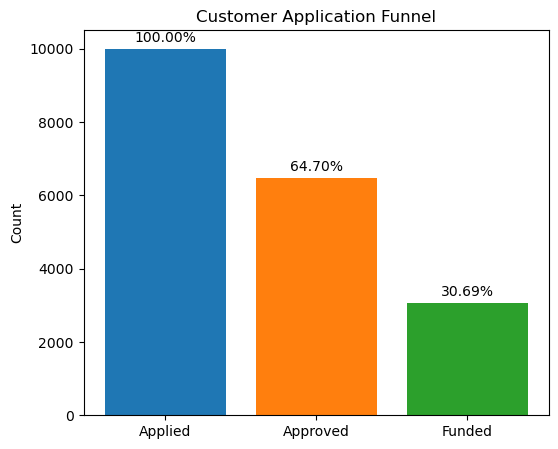

      Stage  Count  Percent
0   Applied  10000  100.00%
1  Approved   6470   64.70%
2    Funded   3069   30.69%


In [25]:
# Funnel Analysis
stages = ["Applied", "Approved", "Funded"]
vals = [len(df), df["approved_flag"].sum(), df["funded_flag"].sum()]
total = vals[0]
percentages = [(v / total) * 100 for v in vals]
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(stages, vals, color=["#1f77b4", "#ff7f0e", "#2ca02c"])
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_height() + total * 0.01,f"{pct:.2f}%",ha="center",va="bottom")
ax.set_ylabel("Count")
ax.set_title("Customer Application Funnel")
plt.show()
funnel_df = pd.DataFrame({"Stage": stages,"Count": vals,"Percent": [f"{p:.2f}%" for p in percentages]})
print(funnel_df)

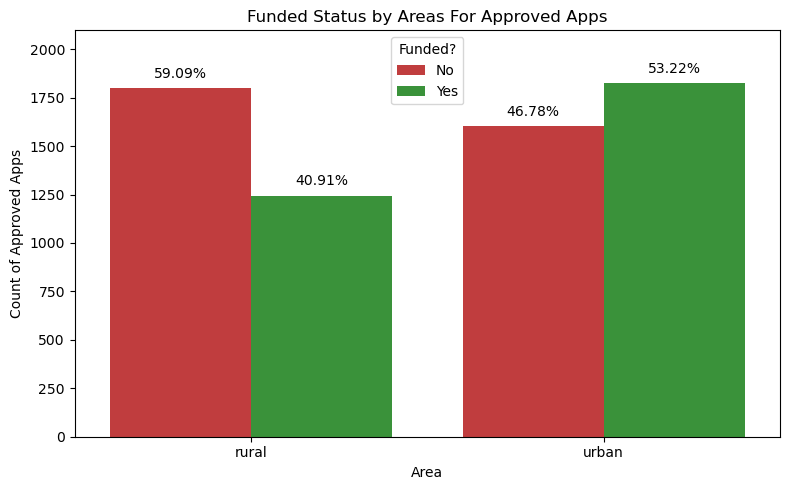

,approved_apps,funded,avg_loan_amount,funded_rate,funded_rate_pct
area,,,,,
rural,3043,1245,11628.27,0.409136,40.91%
urban,3427,1824,12248.57,0.532244,53.22%


In [27]:
# Area Performance
approved = df[df['approved_flag'] == 1].copy()
approved['funded_status'] = approved['funded_flag'].map({0: 'No', 1: 'Yes'})
area_stats = (approved.groupby(['area', 'funded_status']).size().reset_index(name='Count'))
area_stats['Pct'] = (area_stats.groupby('area')['Count'].transform(lambda x: x / x.sum() * 100))
area_order   = sorted(area_stats['area'].unique())     # e.g. ['rural','urban']
status_order = ['No','Yes']
area_stats['area']          = pd.Categorical(area_stats['area'], categories=area_order, ordered=True)
area_stats['funded_status'] = pd.Categorical(area_stats['funded_status'], categories=status_order, ordered=True)
area_stats = area_stats.sort_values(['area','funded_status']).reset_index(drop=True)
plt.figure(figsize=(8,5))
ax = sns.barplot(data=area_stats,x='area',y='Count',hue='funded_status',palette=['#d62728','#2ca02c'],order=area_order,hue_order=status_order,dodge=True)
n_hues    = len(status_order)
bar_width = 0.8
for idx, row in area_stats.iterrows():
    i = area_order.index(row['area'])
    j = status_order.index(row['funded_status'])
    x = i - bar_width/2 + j * (bar_width/n_hues) + (bar_width/(2*n_hues))
    y = row['Count']
    ax.text(x, y + area_stats['Count'].max()*0.02, f"{row['Pct']:.2f}%",ha='center',va='bottom')
ax.set_title('Funded Status by Areas For Approved Apps')
ax.set_xlabel('Area')
ax.set_ylabel('Count of Approved Apps')
ax.legend(title='Funded?')
plt.ylim(0, area_stats['Count'].max() * 1.15)
plt.tight_layout()
plt.show()

area_summary = (
    df.groupby("area").agg(approved_apps     = ("approved_flag", "sum"),funded = ("funded_flag", "sum"),avg_loan_amount  = ("Loanamount",  "mean"))
    .assign(funded_rate       = lambda x: x["funded"] / x["approved_apps"],
        funded_rate_pct   = lambda x: (x["funded_rate"] * 100).round(2).astype(str) + "%")
    .round({"avg_loan_amount": 2}))
display(area_summary)

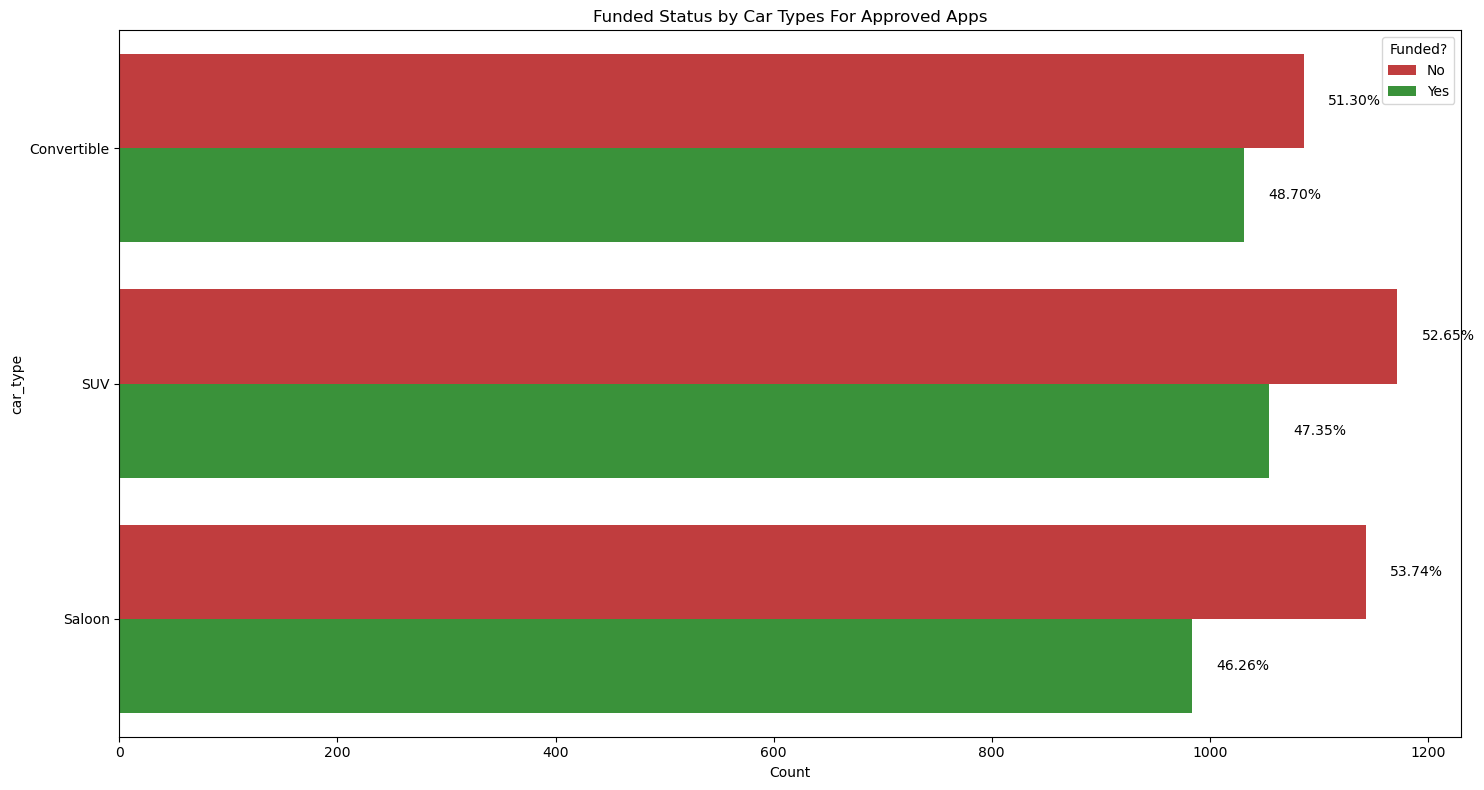

,approved_apps,funded,avg_loan_amount,funded_rate,funded_rate_pct
car_type,,,,,
Convertible,2117,1031,17179.44,0.487010,48.7%
SUV,2226,1054,10744.50,0.473495,47.35%
Saloon,2127,984,8271.48,0.462623,46.26%


In [29]:
# Car Type Performance
approved = df[df['approved_flag'] == 1].copy()
approved['funded_status'] = approved['funded_flag'].map({0: 'No', 1: 'Yes'})
area_totals = approved.groupby('car_type').size().to_dict()
car_order = sorted(area_totals.keys())
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=approved,y='car_type',hue='funded_status',order=car_order,palette=['#d62728', '#2ca02c'])
for container in ax.containers:
    for bar in container:
        cnt = bar.get_width()
        center_y = bar.get_y() + bar.get_height() / 2
        idx = int(round(center_y))
        car = car_order[idx]
        pct = cnt / area_totals[car] * 100
        ax.text(cnt + max(area_totals.values()) * 0.01,center_y,f"{pct:.2f}%",va='center')
ax.set_title('Funded Status by Car Types For Approved Apps')
ax.set_xlabel('Count')
ax.legend(title='Funded?')
plt.tight_layout()
plt.show()

car_summary = (df.groupby("car_type")
    .agg(approved_apps   = ("approved_flag", "sum"),funded = ("funded_flag", "sum"),avg_loan_amount  = ("Loanamount", "mean"))
    .assign(funded_rate  = lambda x: x["funded"] / x["approved_apps"],
        funded_rate_pct  = lambda x: (x["funded_rate"] * 100).round(2).astype(str) + "%").round({"avg_loan_amount": 2}))
display(car_summary)

In [30]:
# Age Grouped Performance
approved_only = df[df['approved_flag'] == 1]
age_summary_approved = (
    approved_only
    .groupby("Age_Grouped")
    .agg(approved_apps    = ("ID",          "count"),funded           = ("funded_flag", "sum"),avg_loan_amount  = ("Loanamount",  "mean")))
age_summary_approved["funded_rate"] = (age_summary_approved["funded"]/ age_summary_approved["approved_apps"])
age_summary_approved["funded_rate_pct"] = (
    age_summary_approved["funded_rate"] * 100
).round(2).astype(str) + "%"
display(age_summary_approved)

,approved_apps,funded,avg_loan_amount,funded_rate,funded_rate_pct
Age_Grouped,,,,,
18-20,196,86,12341.484694,0.438776,43.88%
21-25,388,174,11827.105670,0.448454,44.85%
26-30,475,249,12075.741053,0.524211,52.42%
31-35,454,216,12361.486784,0.475771,47.58%
36-40,822,387,11811.542579,0.470803,47.08%
41-45,770,362,11989.357143,0.470130,47.01%
46-50,834,385,12420.197842,0.461631,46.16%
51-55,735,332,12289.104762,0.451701,45.17%
56-60,891,420,12389.445567,0.471380,47.14%


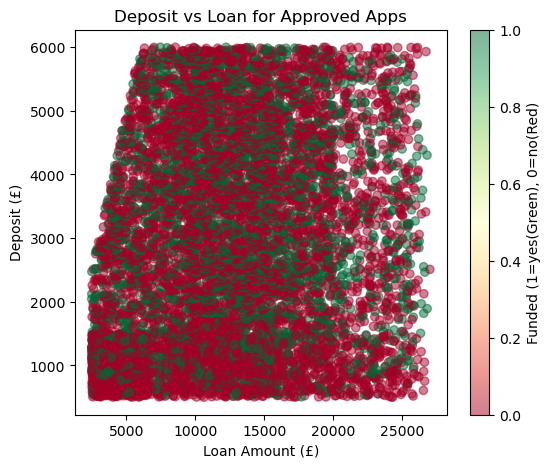

In [33]:
# Loan Economics
plt.figure(figsize=(6,5))
plt.scatter(df["Loanamount"], df["Deposit"], c=df["funded_flag"], cmap="RdYlGn", alpha=0.5)
plt.xlabel("Loan Amount (£)")
plt.ylabel("Deposit (£)")
plt.title("Deposit vs Loan for Approved Apps")
plt.colorbar(label="Funded (1=yes(Green), 0=no(Red)")
plt.show()

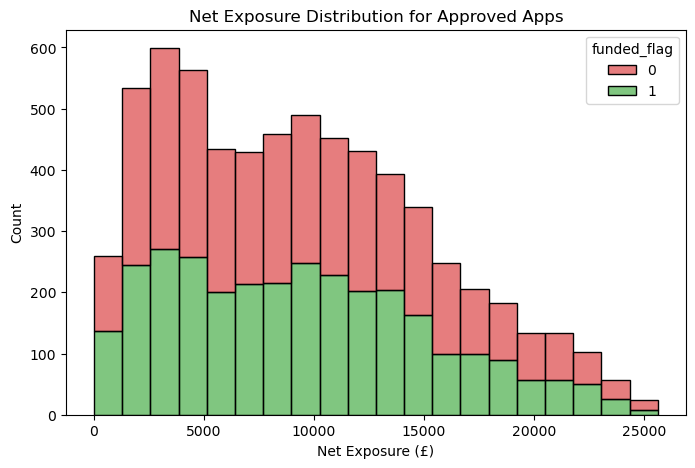

count     6470.000000
mean      9397.023957
std       5854.074304
min          2.000000
25%       4358.000000
50%       8868.500000
75%      13476.000000
max      25635.000000
Name: Net_Exposure, dtype: float64

In [34]:
# Net Exposure Performance
# Net Exposure = Loan - Deposit
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['approved_flag'] == 1],x="Net_Exposure",hue="funded_flag",bins=20,palette=["#d62728", "#2ca02c"],alpha=0.6,multiple="stack",legend=True)
plt.title("Net Exposure Distribution for Approved Apps")
plt.xlabel("Net Exposure (£)")
plt.ylabel("Count")
palette = sns.color_palette(["#d62728", "#2ca02c"])
labels  = sorted(df["funded_flag"].unique())
handles = [Patch(color=palette[i], label=f"{lab}") 
           for i, lab in enumerate(labels)]
plt.show()
approved_net = df.loc[df['application_outcome'] == 'approved','Net_Exposure']
approved_net.describe()

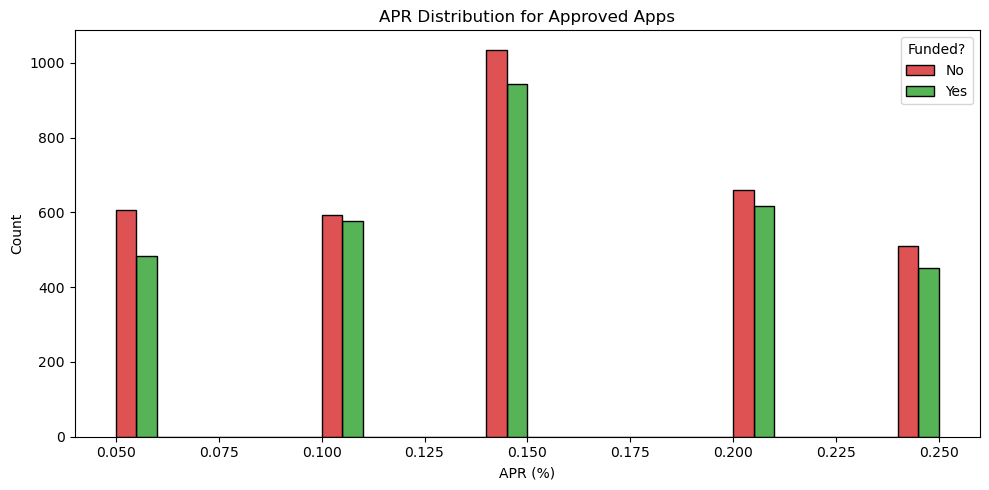

,approved_apps,funded,funded_rate,funded_rate_pct
APR,,,,
0.05,1088,483,0.443934,44.39%
0.10,1171,578,0.493595,49.36%
0.15,1977,942,0.476480,47.65%
0.20,1275,616,0.483137,48.31%
0.25,959,450,0.469239,46.92%


In [36]:
# Funding Status: APR for Approved Apps
approved = df[df['approved_flag'] == 1].copy()
approved['Funded?'] = approved['funded_flag'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(10, 5))
sns.histplot(data=approved,x='APR',hue='Funded?',bins=20,palette=['#d62728', '#2ca02c'],alpha=0.8,multiple='dodge',legend=True)
plt.title('APR Distribution for Approved Apps')
plt.xlabel('APR (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

approved_df = df[df["approved_flag"] == 1].copy()
aprs = [0.05, 0.10, 0.15, 0.20, 0.25]
approved_df = approved_df[approved_df["APR"].isin(aprs)]
apr_summary = (approved_df.groupby("APR").agg(approved_apps = ("approved_flag", "count"),funded  = ("funded_flag",   "sum"))
.assign(funded_rate     = lambda x: x["funded"] / x["approved_apps"],funded_rate_pct = lambda x: (x["funded_rate"] * 100).round(2).astype(str) + "%"))
display(apr_summary)

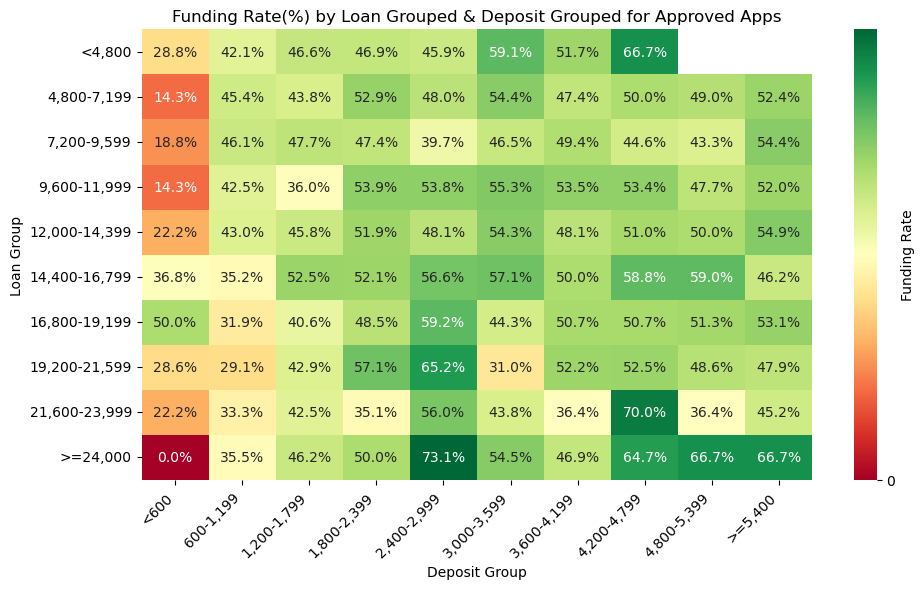

In [38]:
# Funding Rate: Loan Amount X Deposit Grouped
approved = df[df['approved_flag'] == 1].copy()
pivot = approved.pivot_table(index='Loanamount_Grouped',columns='Deposit_Grouped',values='funded_flag',aggfunc='mean')
plt.figure(figsize=(10, 6))
ax = sns.heatmap(pivot,annot=True,fmt='.1%',cmap='RdYlGn',cbar_kws={'ticks': [0, 1]})
cbar = ax.collections[0].colorbar
cbar.set_label('Funding Rate') 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Funding Rate(%) by Loan Grouped & Deposit Grouped for Approved Apps')
plt.xlabel('Deposit Group')
plt.ylabel('Loan Group')
plt.tight_layout()
plt.show()

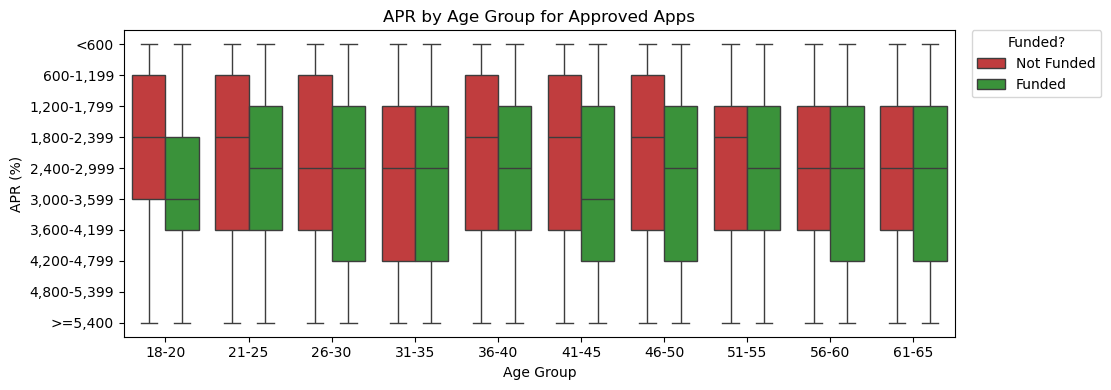

In [40]:
# Funding Status: APR x Age Grouped
approved = df[df['approved_flag'] == 1].copy()
approved['funded_status'] = approved['funded_flag'].map({0: 'Not Funded', 1: 'Funded'})
plt.figure(figsize=(12, 4))
ax = sns.boxplot(x='Age_Grouped',y='Deposit_Grouped',hue='funded_status',data=approved,palette=['#d62728', '#2ca02c'])
plt.title('APR by Age Group for Approved Apps')
plt.xlabel('Age Group')
plt.ylabel('APR (%)')
plt.legend(title='Funded?',loc='upper left',bbox_to_anchor=(1.02, 1),borderaxespad=0)
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

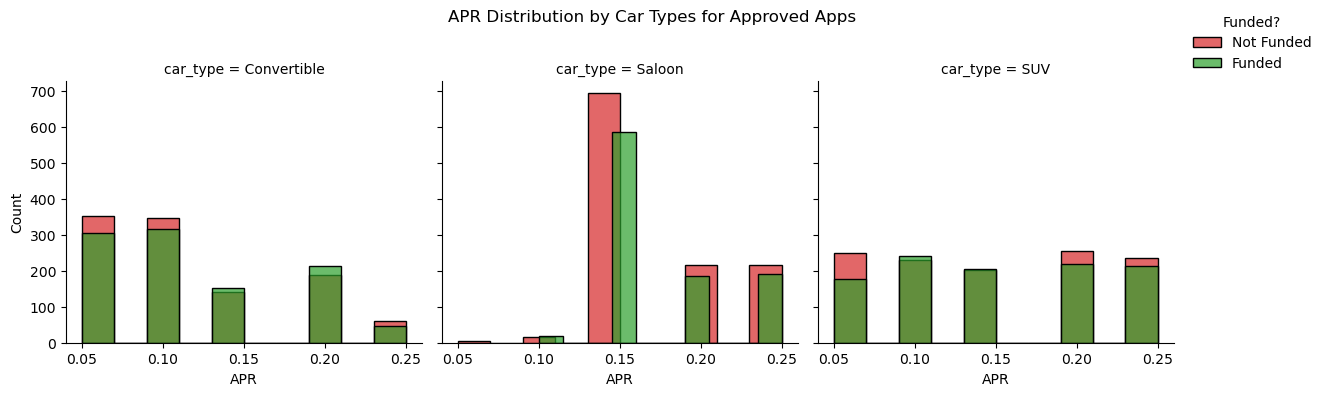

In [42]:
# Funding Status: APR x Car Type
approved = df[df["approved_flag"] == 1].copy()
approved["funded_status"] = approved["funded_flag"].map({0: "Not Funded", 1: "Funded"})
g = sns.FacetGrid(approved,col="car_type",hue="funded_status",palette={"Not Funded": "#d62728", "Funded": "#2ca02c"},height=4)
g.map(sns.histplot, "APR", bins=10, alpha=0.7)
g.add_legend(title="Funded?",loc="upper right",bbox_to_anchor=(1.0, 0.98),borderaxespad=0.0)
plt.subplots_adjust(top=0.8)
g.fig.suptitle("APR Distribution by Car Types for Approved Apps")
plt.show()

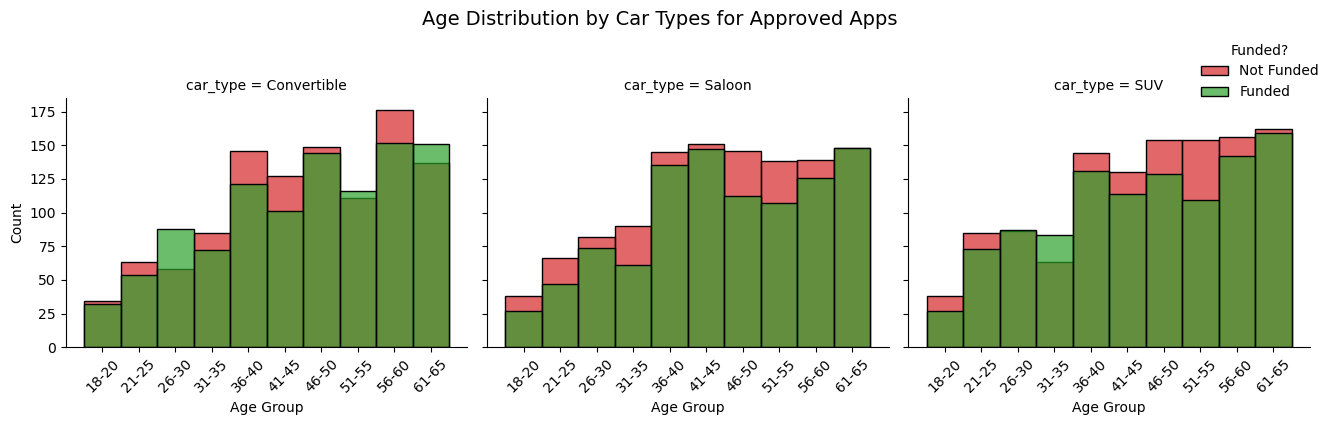

In [44]:
# Funding Status: Age Grouped X Car Type 
approved = df[df["approved_flag"] == 1].copy()
approved["funded_status"] = approved["funded_flag"].map({0: "Not Funded", 1: "Funded"})
g = sns.FacetGrid(approved,col="car_type",hue="funded_status",palette={"Not Funded": "#d62728", "Funded": "#2ca02c"},height=4)
g.map(sns.histplot, "Age_Grouped", bins=10, alpha=0.7)
g.set_axis_labels("Age Group", "Count")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Age Distribution by Car Types for Approved Apps",y=1.05,fontsize=14)
g.add_legend(title="Funded?",loc="upper right",bbox_to_anchor=(1.0, 0.98),borderaxespad=0.0)
plt.subplots_adjust(top=0.88, right=0.90)
plt.tight_layout()
plt.show()

---
### Summary

#### 1. Context
From a total of **6,470 approved loan applications**, **3,401 (≈52.6%)** did not convert into funded loans.  
This represents the **largest leakage point in the funnel**, and therefore the biggest opportunity for the marketing team to drive growth.

---

#### 2. Segment-level Observations
- **Car Type**
  - SUVs (1,172 not funded), Saloons (1,143), and Convertibles (1,086) dominate the drop-offs.
  - These three segments account for nearly all unfunded approvals, making them priority targets.

- **Geography**
  - Rural applicants = 1,798 not funded (more than Urban = 1,603).
  - Rural customers show higher friction post-approval, possibly due to trust, access, or documentation hurdles.

- **Age Groups**
  - Middle-to-older cohorts (36–65) have the highest unfunded counts.
  - Younger cohorts (<36) are smaller in absolute numbers but may still require trust-building campaigns.

- **APR**
  - Average APRs are very similar between funded and not funded approvals (0.15%).
  - This suggests APR is not the single driver of funding drop-off.
---

#### 3. Recommendations
- Re-engagement Campaigns - Follow-up  to approved-but-not-funded applicants, combining urgency and support to boost conversion within the first week.

- Segment-Specific Focus- highlight speed and affordability for urban SUV/Saloon buyers, build trust for rural customers, stress simplicity for older cohorts, and use mobile-friendly affordability messaging for younger applicants.
---